In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.integrate as integrate
import scipy.optimize as optimize
import scipy.stats as stats

import asymNdimPdf as apdf

In [6]:
import matplotlib as mpl
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.fontsize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['figure.figsize'] = (10, 7)

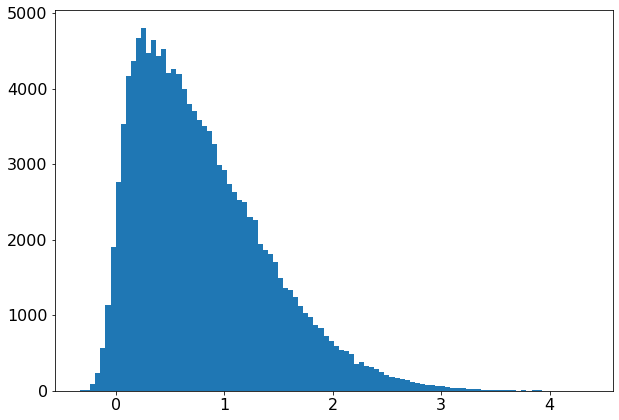

In [7]:
sn1D = apdf.ndimSkewNormal(alpha=10)
data = apdf.generateData(sn1D.pdf, n=1000000)
plt.hist(data, bins=100);

Text(0, 0.5, 'Normalized output')

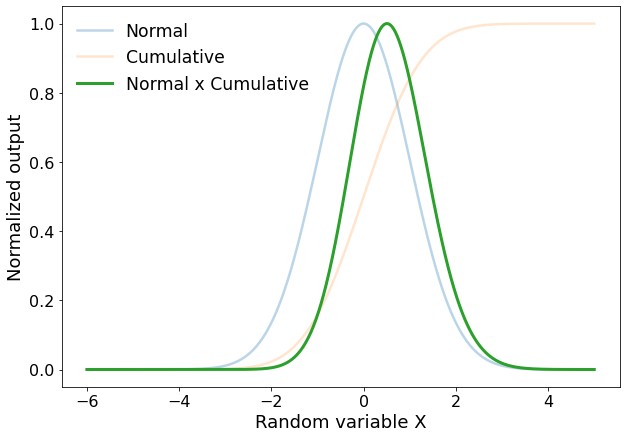

In [8]:
f1 = stats.norm.pdf
f2 = stats.norm.cdf
xs = np.linspace(-6, 5, 1000)

alpha = 1
g2 = lambda x, alpha: f2(alpha*x)
plt.plot(xs, f1(xs) / np.max(f1(xs)), label='Normal', alpha=0.3)
plt.plot(xs, g2(xs, alpha) / np.max(g2(xs, alpha)), label='Cumulative', alpha=0.2)
plt.plot(xs, f1(xs)*g2(xs, alpha) / np.max(f1(xs)*g2(xs, alpha)), label='Normal x Cumulative', linewidth=3)
plt.legend()
plt.xlabel('Random variable X')
plt.ylabel('Normalized output')

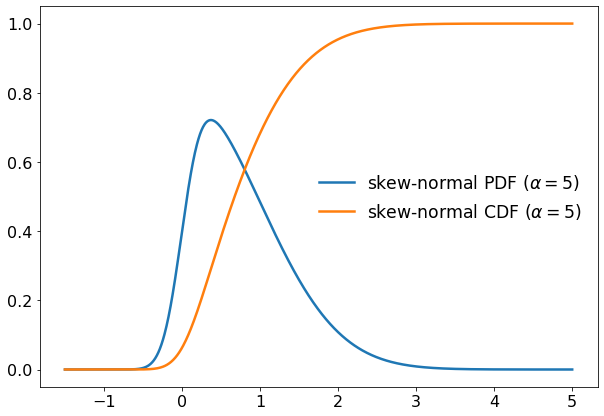

In [9]:
xs = np.linspace(-1.5, 5, 1000)
sn1D = apdf.ndimSkewNormal(alpha=5)
plt.plot(xs, sn1D.pdf(xs), label='skew-normal PDF ($\\alpha=5$)');
plt.plot(xs, sn1D.cdf1D(xs), label='skew-normal CDF ($\\alpha=5$)');
plt.legend();

In [10]:
# Comparing function and numerically computed quantities
mean = integrate.quad(lambda x: x*sn1D.pdf(x), -10, 10)[0]
mode = optimize.minimize_scalar(lambda x: -np.abs(sn1D.pdf(x))).x
std  = np.sqrt(integrate.quad(lambda x: (x-mean)**2 * sn1D.pdf(x), -10, 10)[0])
m3 = integrate.quad(lambda x: x**3 * sn1D.pdf(x), -10, 10)[0]
skew = 1/std**3 * (m3 - 3*mean*std**2 - mean**3)

print('Mean: {:.3f} vs {:.3f}'.format(sn1D.mean1D(), mean))
print('Mode: {:.3f} vs {:.3f}'.format(sn1D.mode1D(), mode))
print('Std : {:.3f} vs {:.3f}'.format(sn1D.std1D() , std ))
print('Skew: {:.3f} vs {:.3f}'.format(sn1D.skew1D(), skew))

Mean: 0.782 vs 0.782
Mode: 0.375 vs 0.371
Std : 0.623 vs 0.623
Skew: 0.851 vs 0.851


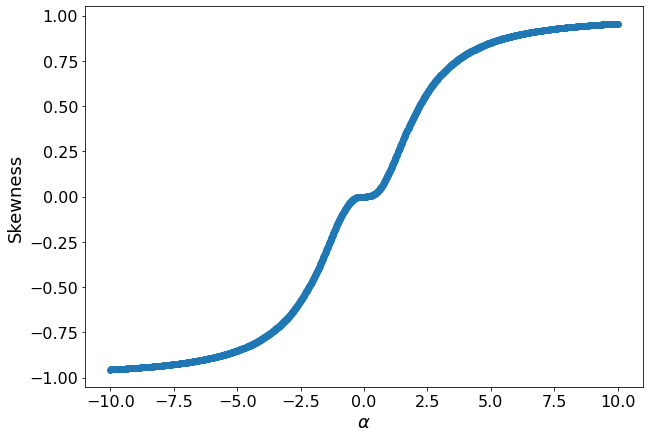

In [11]:
alphas = np.linspace(-10, 10, 1000)
skew = [apdf.ndimSkewNormal(alpha=a).skew1D() for a in alphas]
plt.plot(alphas, skew, 'o');
plt.xlabel('$\\alpha$')
plt.ylabel('Skewness');

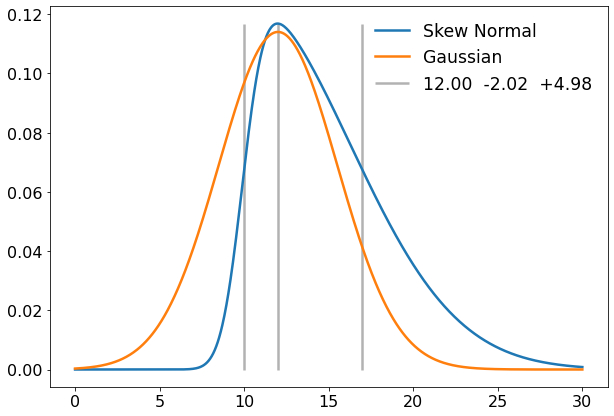

In [12]:
def plotSN(loc, scale, alpha, xmin=-5, xmax=5):

    # Comparing with a symetric gaussian
    def gaussian(x, mu, sig):
        return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)
    
    # PDF
    sn = apdf.ndimSkewNormal(loc=loc, scale=scale, alpha=alpha)
    
    # Error parameters
    c, n, p = sn.measAsymError()
    
    x = np.linspace(xmin, xmax, 1000)
    plt.plot(x, sn.pdf(x), label='Skew Normal')
    plt.plot(x, gaussian(x, c, (n+p)/2), label='Gaussian')
    plt.vlines(x=[c-n, c, c+p], ymin=[0]*3, ymax=[np.max(sn.pdf(x))]*3, 
               label='{:.2f}  -{:.2f}  +{:.2f}'.format(c, n, p), alpha=0.3
              )
    plt.legend()
    
loc, scale, alpha = apdf.paramFromMeas(12, 2, 5)
plotSN(loc, scale, alpha, xmin=0, xmax=30)

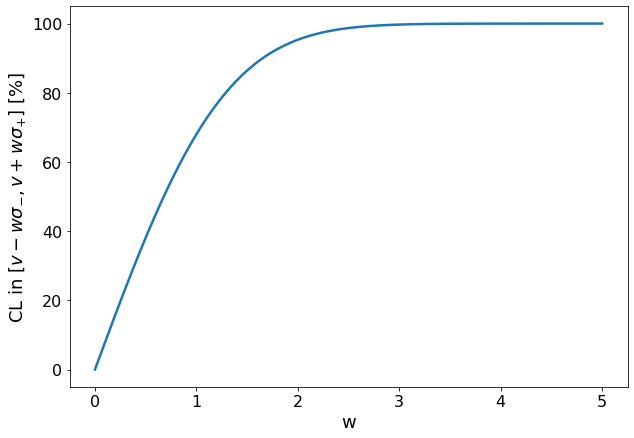

In [13]:
win = np.linspace(0, 5, 1000)
sn = apdf.ndimSkewNormal()
val, eNe, ePo = sn.measAsymError()
CLs = np.array([sn.interval1D(val-w*eNe, val+w*ePo) for w in win])*100
plt.plot(win, CLs)
plt.ylabel('CL in $[v-w \\sigma_{-}, v+w \\sigma_{+}]$ [%]')
plt.xlabel('w');

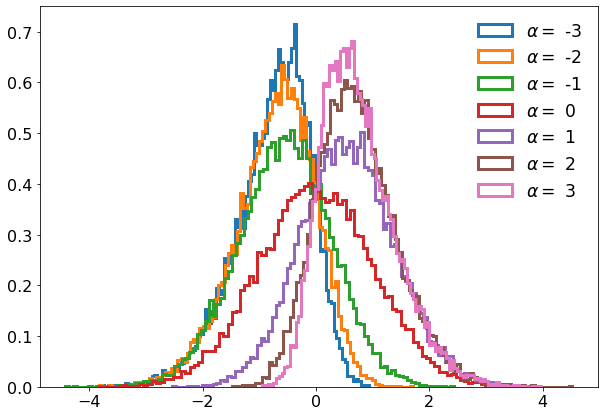

In [14]:
plt.figure(figsize=(10, 7))
for a in [-3, -2, -1, 0, 1, 2, 3]:
    f = apdf.ndimSkewNormal(alpha=a).pdf
    data = apdf.generateData(f, n=100000)
    plt.hist(data, bins=100, histtype='step', label='$\\alpha=$ ' + '{}'.format(a), density=True, linewidth=3)
plt.legend();

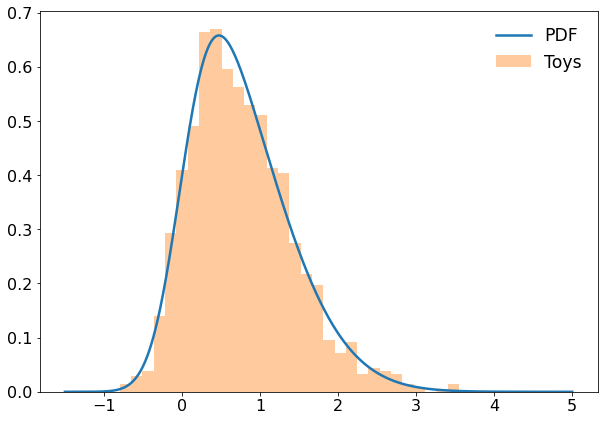

In [15]:
f = apdf.ndimSkewNormal(alpha=3).pdf
xs = np.linspace(-1.5, 5, 1000)
plt.plot(xs, f(xs), label='PDF');
plt.hist(apdf.generateData(f, n=10000), density=True, bins=30, alpha=0.4, label='Toys')
plt.legend();

In [16]:
# # Draw the most probable value and the errors as function of skewnewss
# cVals, eNegs, ePoss = [], [], []

# alphas = np.concatenate(
#     (np.linspace(-15 , -1.5,  30),
#      np.linspace(-1.5,  1.5,  30),
#      np.linspace( 1.5,   15,  30),
# ))

# for a in alphas:
#     v, m, p = apdf.ndimSkewNormal(alpha=a).measAsymError()
#     cVals.append(v)
#     eNegs.append(m)
#     ePoss.append(p)
    
# # Numpy array conversion
# cVals, eNegs, ePoss = np.array(cVals), np.array(eNegs), np.array(ePoss)

# # Plot
# plt.plot(alphas, cVals, label='central value', linewidth=3, marker='o')
# plt.fill_between(alphas, y1=cVals-eNegs, y2=cVals+ePoss, label='Asym. Unc.', alpha=0.3)
# plt.xlabel('alpha parameter')
# plt.ylabel('Value')
# plt.legend();

In [17]:
import matplotlib as mpl
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.fontsize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['figure.figsize'] = (10, 7)

In [18]:
import numpy as np
import asymNdimPdf as apdf

# List of measrurement central value, negative error, positive error
measList = np.array([
    [ 294, 29.7, 23.7],
    [1420, 34.2, 33.5],
    [1260, 34.4, 32.7],
    [ 189, 17.3, 19.9],
])

# Covariance
cov = np.array([
    [ 1.0000, -0.1949,  0.2583, -0.3933],
    [-0.1949,  1.0000, -0.1188,  0.2919],
    [ 0.2583, -0.1188,  1.0000, -0.3443],
    [-0.3933,  0.2919, -0.3443,  1.0000],
])

# Get skew-normal parameters corresponding to individual measurements
snParams = []
for m in measList:
    snParams.append(apdf.paramFromMeas(*m))

# Define the n-dim location, scale, alpha 
loc, scale, alpha = [], [], []
for p in snParams:
    loc.append(p[0])
    scale.append(p[1])
    alpha.append(p[2])

# Create a n-dim skew normal
ndSN = apdf.ndimSkewNormal(loc=loc, scale=scale, cov=cov, alpha=alpha)

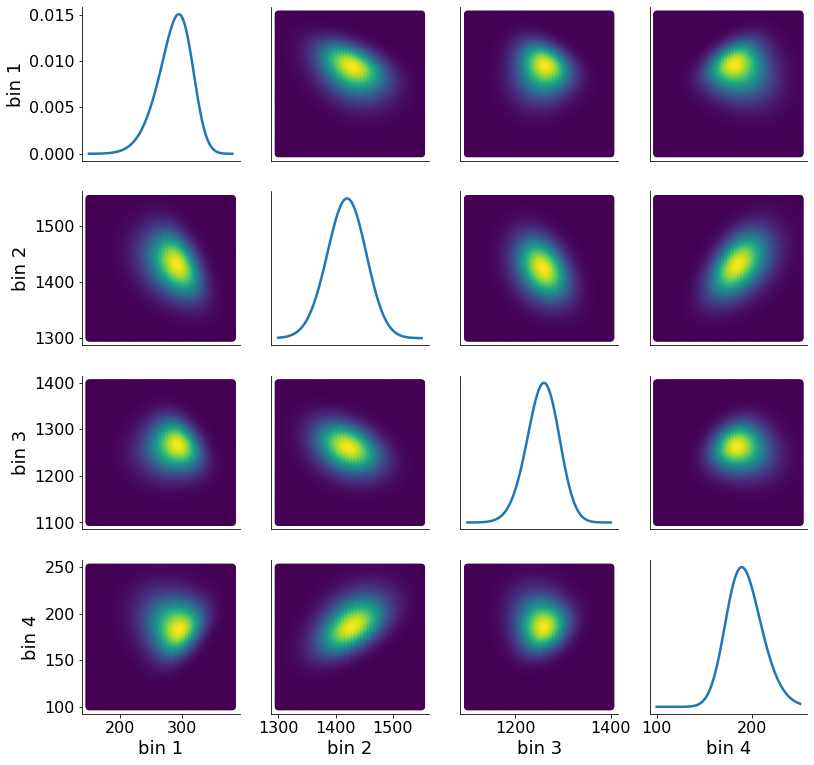

In [21]:
# Random variable ranges
borders = [ 
          [ 150,  380], 
          [1300, 1550],
          [1100, 1400],
          [ 100,  250],
         ]

varName = ['bin 1', 'bin 2', 'bin 3', 'bin 4']

# Plotting each variable pair
ndSN.plot(varNames=varName, borders=borders, nPoints=100, contour=False)

In [25]:
# Symetric measurement
meas = [294, 13.8, 13.8]
l, s, a = apdf.paramFromMeas(294, 13.8, 13.8)

In [28]:
snPerfect  = apdf.ndimSkewNormal(loc=294, scale=13.8, alpha=0.0).pdf
snObtained = apdf.ndimSkewNormal(loc=l  , scale=s   , alpha=a  ).pdf
gaussian   = stats.norm(loc=294, scale=13.8).pdf

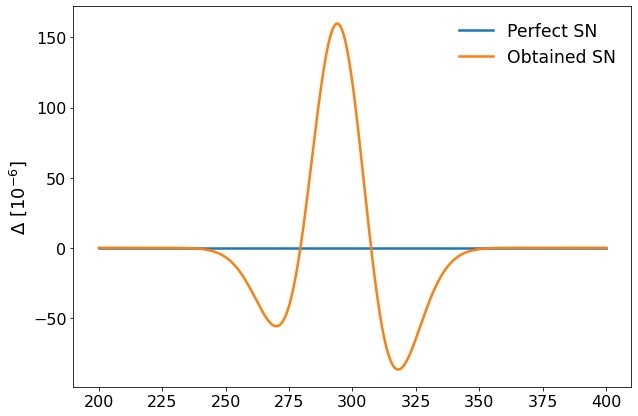

In [35]:
x = np.linspace(200, 400, 1000)
plt.plot(x, (gaussian(x) - snPerfect(x))  / 1e-6 , label='Perfect SN')
plt.plot(x, (gaussian(x) - snObtained(x)) / 1e-6, label='Obtained SN')
plt.ylabel('$\\Delta$ [$10^{-6}$]')
plt.legend();